In [8]:
from Code.data_loaders import load_data_labels_based_on_dataset
from share import datasets_basic_infos
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm

import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.stats import permutation_cluster_1samp_test as pcluster_test
from mne.time_frequency import tfr_multitaper
from data_utils import train_test_val_split
from pathlib import Path

ROOT_VOTING_SYSTEM_PATH: str = "/Users/almacuevas/work_projects/voting_system_platform"

subject_id = 2  # Only two things I should be able to change
dataset_name = 'aguilera_gamified'  # Only two things I should be able to change

# Folders and paths
dataset_foldername = dataset_name + '_dataset'
computer_root_path = str(ROOT_VOTING_SYSTEM_PATH) + "/Datasets/"
data_path = computer_root_path + dataset_foldername
dataset_info = datasets_basic_infos[dataset_name]

epochs, data, labels = load_data_labels_based_on_dataset(dataset_name, subject_id, data_path)
data_train, data_test, _, labels_train, labels_test, _ = train_test_val_split(
        dataX=data, dataY=labels, valid_flag=False)

Used Annotations descriptions: ['OVTK_StimulationId_EndOfFile', 'OVTK_StimulationId_Number_01', 'OVTK_StimulationId_Number_02', 'OVTK_StimulationId_Number_03', 'OVTK_StimulationId_Number_04', 'OVTK_StimulationId_Number_05', 'OVTK_StimulationId_Number_06', 'OVTK_StimulationId_Number_07', 'OVTK_StimulationId_Number_08']
Not setting metadata
120 matching events found
Setting baseline interval to [0.0, 1.4] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 701 original time points ...
0 bad epochs dropped


/Users/almacuevas/work_projects/voting_system_platform/Code/data_loaders.py:29: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(mne.channels.read_custom_montage(channel_location))


In [9]:
freqs = np.arange(2, 36)  # frequencies from 2-35Hz
vmin, vmax = -1, 1.5  # set min and max ERDS values in plot
baseline = (0, 1.4)  # baseline interval (in s)
cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)  # min, center & max ERDS

kwargs = dict(
    n_permutations=100, step_down_p=0.05, seed=1, buffer_size=None, out_type="mask"
)  # for cluster test

tmin, tmax = -1, 4
event_ids = {"OVTK_StimulationId_Number_01":0, "OVTK_StimulationId_Number_02":1, "OVTK_StimulationId_Number_03":2, "OVTK_StimulationId_Number_04":3}  # map event IDs to tasks
#event_ids = {"OVTK_StimulationId_Label_01":0, "OVTK_StimulationId_Label_02":1, "OVTK_StimulationId_Label_03":2, "OVTK_StimulationId_Label_04":3}  # map event IDs to tasks

In [10]:
tfr = tfr_multitaper(
    epochs,
    freqs=freqs,
    n_cycles=freqs,
    use_fft=True,
    return_itc=False,
    average=False,
    decim=2,
)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.3s


Not setting metadata


Applying baseline correction (mode: percent)


/var/folders/v0/vyb8z9hs3b166f_7lmxwvfbr0000gn/T/ipykernel_49521/2747423001.py:1: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.time_frequency.tfr.EpochsTFR'>.tmin (0 s)
  tfr.crop(tmin, tmax).apply_baseline(baseline, mode="percent")
/var/folders/v0/vyb8z9hs3b166f_7lmxwvfbr0000gn/T/ipykernel_49521/2747423001.py:1: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.time_frequency.tfr.EpochsTFR'>.tmax (1.4 s)
  tfr.crop(tmin, tmax).apply_baseline(baseline, mode="percent")


Using a threshold of 1.699127
stat_fun(H1): min=-5.985011 max=5.027883
Running initial clustering …
Found 53 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-5.985011 max=5.027883
Running initial clustering …
Found 38 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.699127
stat_fun(H1): min=-10.386979 max=5.980966
Running initial clustering …
Found 47 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-10.386979 max=5.980966
Running initial clustering …
Found 27 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.699127
stat_fun(H1): min=-6.234259 max=4.410593
Running initial clustering …
Found 61 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-6.234259 max=4.410593
Running initial clustering …
Found 43 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


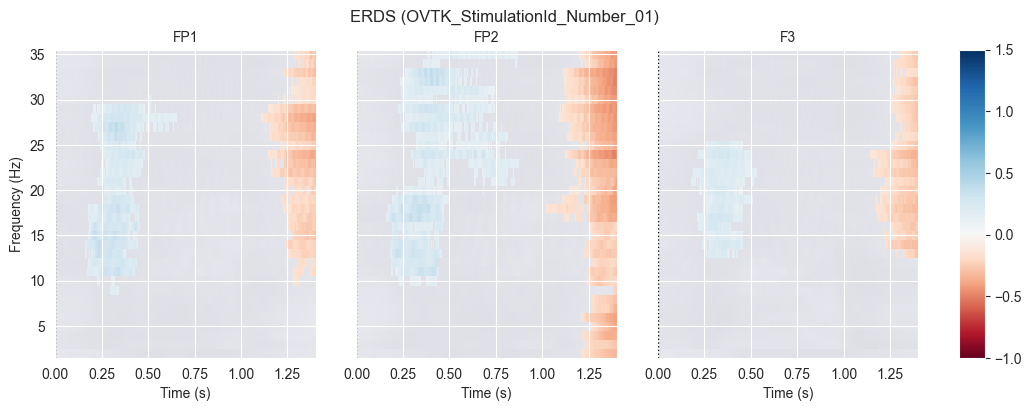

Using a threshold of 1.699127
stat_fun(H1): min=-4.511145 max=4.174384
Running initial clustering …
Found 37 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-4.511145 max=4.174384
Running initial clustering …
Found 45 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.699127
stat_fun(H1): min=-8.097663 max=5.274973
Running initial clustering …
Found 41 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-8.097663 max=5.274973
Running initial clustering …
Found 27 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.699127
stat_fun(H1): min=-5.759136 max=3.800978
Running initial clustering …
Found 57 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-5.759136 max=3.800978
Running initial clustering …
Found 36 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


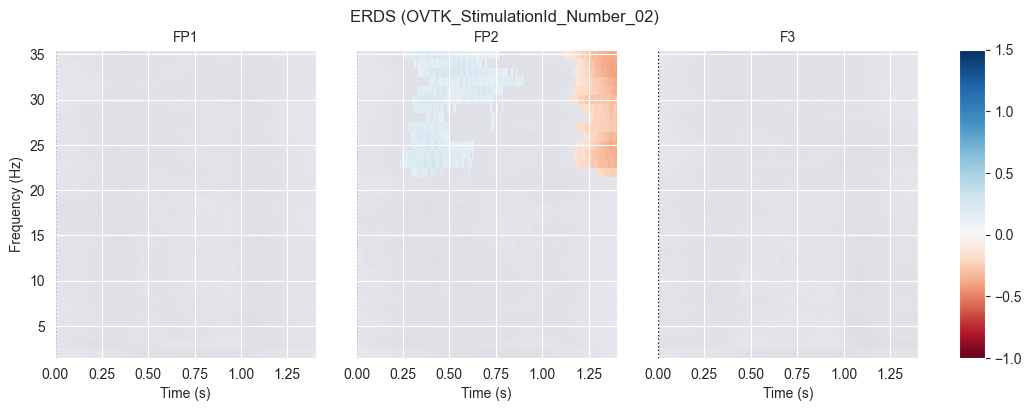

Using a threshold of 1.699127
stat_fun(H1): min=-4.406781 max=4.815314
Running initial clustering …
Found 17 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-4.406781 max=4.815314
Running initial clustering …
Found 62 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.699127
stat_fun(H1): min=-6.092872 max=5.598353
Running initial clustering …
Found 34 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-6.092872 max=5.598353
Running initial clustering …
Found 20 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.699127
stat_fun(H1): min=-6.343390 max=4.061739
Running initial clustering …
Found 85 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-6.343390 max=4.061739
Running initial clustering …
Found 26 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


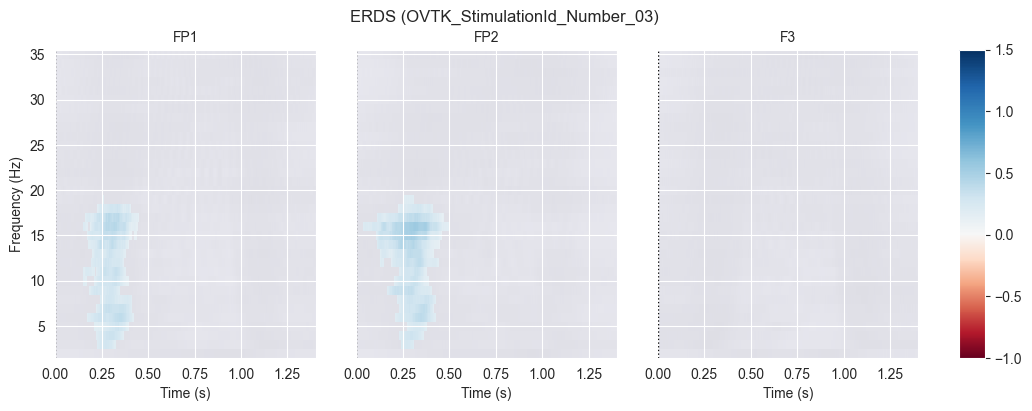

Using a threshold of 1.699127
stat_fun(H1): min=-4.546630 max=4.537119
Running initial clustering …
Found 36 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-4.546630 max=4.537119
Running initial clustering …
Found 48 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.699127
stat_fun(H1): min=-8.739962 max=4.864420
Running initial clustering …
Found 42 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-8.739962 max=4.864420
Running initial clustering …
Found 34 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.699127
stat_fun(H1): min=-5.420797 max=4.659150
Running initial clustering …
Found 73 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-5.420797 max=4.659150
Running initial clustering …
Found 37 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 2 clusters to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 1 additional cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #3 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


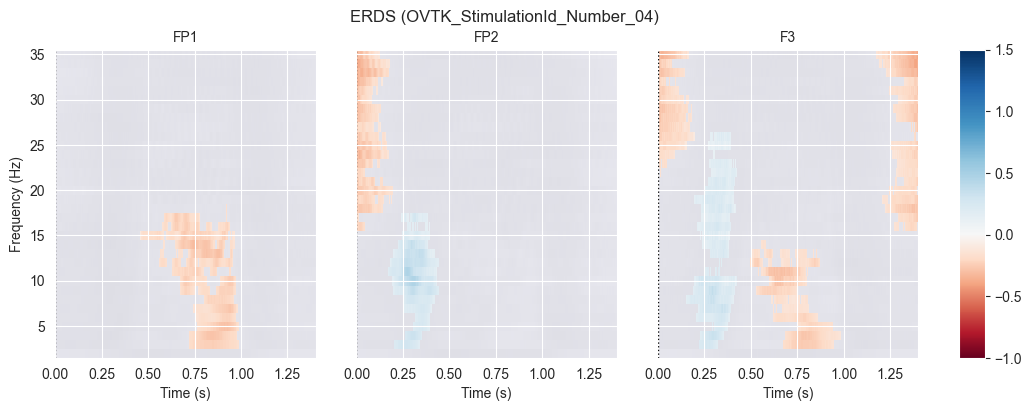

In [11]:
tfr.crop(tmin, tmax).apply_baseline(baseline, mode="percent")

for event in event_ids:
    # select desired epochs for visualization
    tfr_ev = tfr[event]
    fig, axes = plt.subplots(
        1, 4, figsize=(12, 4), gridspec_kw={"width_ratios": [10, 10, 10, 1]}
    )
    for ch, ax in enumerate(axes[:-1]):  # for each channel
        # positive clusters
        _, c1, p1, _ = pcluster_test(tfr_ev.data[:, ch], tail=1, **kwargs)
        # negative clusters
        _, c2, p2, _ = pcluster_test(tfr_ev.data[:, ch], tail=-1, **kwargs)

        # note that we keep clusters with p <= 0.05 from the combined clusters
        # of two independent tests; in this example, we do not correct for
        # these two comparisons
        c = np.stack(c1 + c2, axis=2)  # combined clusters
        p = np.concatenate((p1, p2))  # combined p-values
        mask = c[..., p <= 0.05].any(axis=-1)

        # plot TFR (ERDS map with masking)
        tfr_ev.average().plot(
            [ch],
            cmap="RdBu",
            cnorm=cnorm,
            axes=ax,
            colorbar=False,
            show=False,
            mask=mask,
            mask_style="mask",
        )

        ax.set_title(epochs.ch_names[ch], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS ({event})")
    plt.show()

In [12]:
df = tfr.to_data_frame(time_format=None)
df.head()

time  freq  epoch                     condition       FP1       FP2  \
0  0.000   2.0      0  OVTK_StimulationId_Number_01  0.457362  0.734813   
1  0.004   2.0      0  OVTK_StimulationId_Number_01  0.512874  0.819030   
2  0.008   2.0      0  OVTK_StimulationId_Number_01  0.482996  0.808250   
3  0.012   2.0      0  OVTK_StimulationId_Number_01  0.528197  0.870130   
4  0.016   2.0      0  OVTK_StimulationId_Number_01  0.479653  0.832695   

         F3        F4        C3        C4  ...        P7        P8        Fz  \
0 -0.223469 -0.194304 -0.544362 -0.371606  ... -0.131035  0.092343  0.066539   
1 -0.175092 -0.080290 -0.568668 -0.392107  ... -0.378362 -0.004476  0.121552   
2 -0.232241 -0.143158 -0.431501 -0.371427  ... -0.472006 -0.045823  0.053405   
3 -0.173787 -0.046249 -0.508597 -0.397158  ... -0.474725 -0.154291  0.109802   
4 -0.227286 -0.117938 -0.469067 -0.362391  ... -0.334318 -0.126282  0.036568   

         Cz        Pz        M1        M2       AFz       CPz       POz  
0 -0.400733 -0.425037 -0.519149 -0.576720 -0.002308 -0.421102 -0.354274  
1 -0.491422 -0.489539 -0.547589 -0.592242  0.135330 -0.483233 -0.427761  
2 -0.403654 -0.452475 -0.534223 -0.590283  0.104241 -0.434285 -0.454537  
3 -0.505436 -0.506766 -0.563637 -0.603222  0.233417 -0.495476 -0.500717  
4 -0.417102 -0.444339 -0.532639 -0.588811  0.168145 -0.432455 -0.444808  

[5 rows x 28 columns]

Converting "condition" to "category"...
Converting "epoch" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...


/Users/almacuevas/work_projects/voting_system_platform/env_voting_system_platform/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/almacuevas/work_projects/voting_system_platform/env_voting_system_platform/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/almacuevas/work_projects/voting_system_platform/env_voting_system_platform/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/almacuevas/work_proje

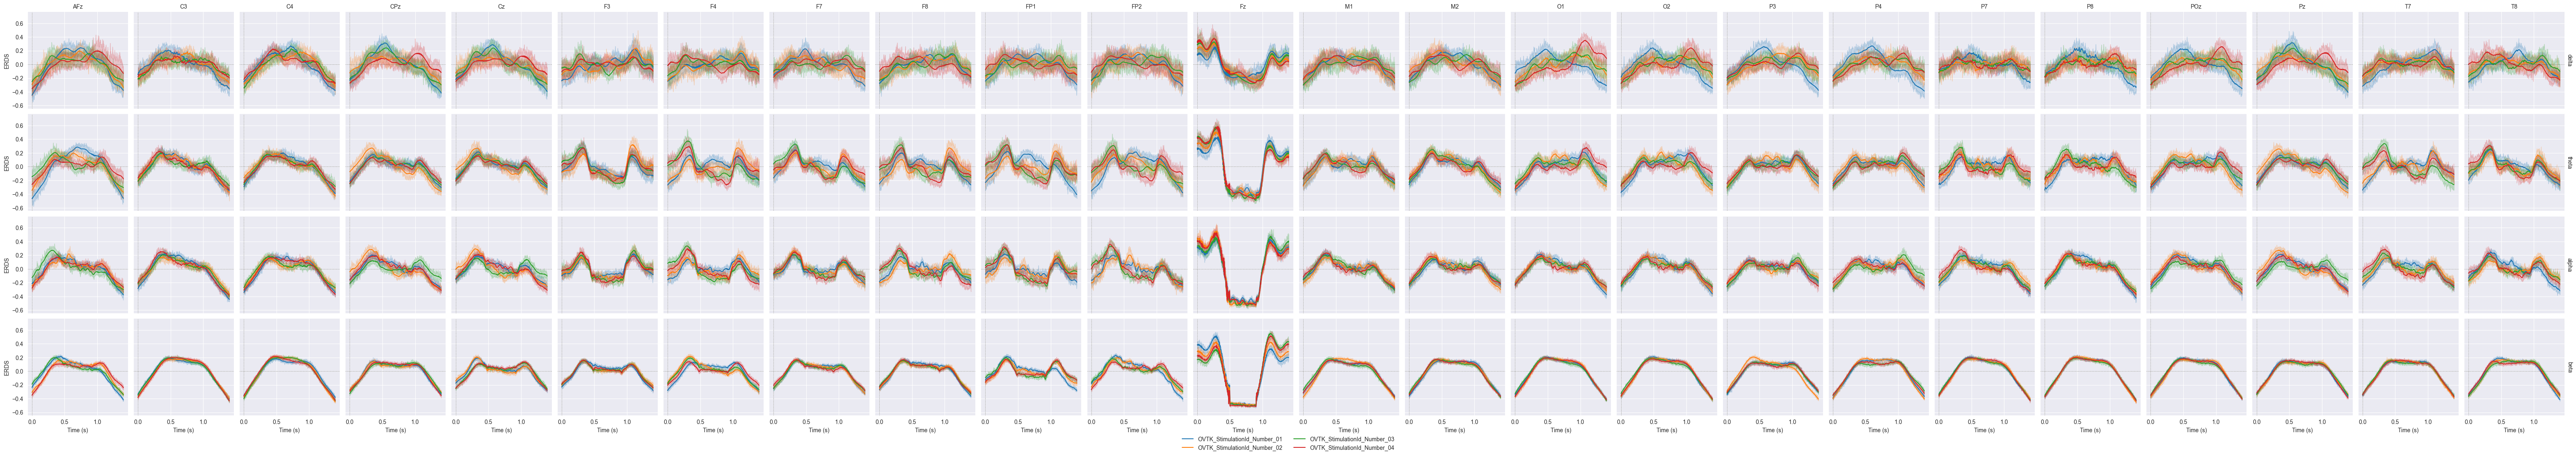

In [13]:
df = tfr.to_data_frame(time_format=None, long_format=True)

# Map to frequency bands:
freq_bounds = {"_": 0, "delta": 3, "theta": 7, "alpha": 13, "beta": 35, "gamma": 140}
df["band"] = pd.cut(
    df["freq"], list(freq_bounds.values()), labels=list(freq_bounds)[1:]
)

# Filter to retain only relevant frequency bands:
freq_bands_of_interest = ["delta", "theta", "alpha", "beta"]
df = df[df.band.isin(freq_bands_of_interest)]
df["band"] = df["band"].cat.remove_unused_categories()

# Order channels for plotting:
#df["channel"] = df["channel"].cat.reorder_categories(("C3", "Cz", "C4"), ordered=True)

g = sns.FacetGrid(df, row="band", col="channel", margin_titles=True)
g.map(sns.lineplot, "time", "value", "condition", n_boot=10)
axline_kw = dict(color="black", linestyle="dashed", linewidth=0.5, alpha=0.5)
g.map(plt.axhline, y=0, **axline_kw)
g.map(plt.axvline, x=0, **axline_kw)
#g.set(ylim=(None, 1.5))
g.set_axis_labels("Time (s)", "ERDS")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(ncol=2, loc="lower center")
g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.08)

/Users/almacuevas/work_projects/voting_system_platform/env_voting_system_platform/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/almacuevas/work_projects/voting_system_platform/env_voting_system_platform/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/almacuevas/work_projects/voting_system_platform/env_voting_system_platform/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(

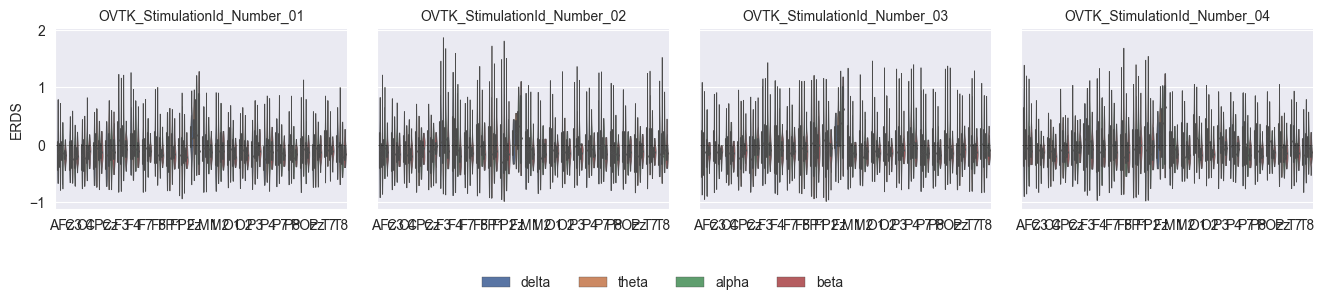

In [14]:
df_mean = (
    df.query("time > 1")
    .groupby(["condition", "epoch", "band", "channel"], observed=False)[["value"]]
    .mean()
    .reset_index()
)

g = sns.FacetGrid(
    df_mean, col="condition", col_order=list(event_ids.keys()), margin_titles=True
)
g = g.map(
    sns.violinplot,
    "channel",
    "value",
    "band",
    cut=0,
    palette="deep",
    hue_order=freq_bands_of_interest,
    linewidth=0.5,
).add_legend(ncol=4, loc="lower center")

g.map(plt.axhline, **axline_kw)
g.set_axis_labels("", "ERDS")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.3)